<a href="https://colab.research.google.com/github/ebzkurt1/ml_from_scratch/blob/main/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction using Feature Extraction Methods
This notebook contains application of Feature Extraction methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
# Loading the wine data from UCI database
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
    header=None)

# Displaying the data attributes
display(wine_data.head())
display(wine_data.describe().transpose())
display(wine_data.info())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,count,mean,std,min,25%,50%,75%,max
0,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
1,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
2,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
3,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
4,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
5,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
6,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
7,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
8,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
9,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


None

## PCA

### PCA from scratch

In [3]:
def standardize(data):
    data_mean = data.mean()
    data_std = data.std()
    return (data - data_mean)/data_std


def PCA(data, k=2):
    standard_data = standardize(data)
    covariance_matrix = np.cov(standard_data.T)
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
    sorted_eig_indices = np.flip(np.argsort(eig_values))
    W = eig_vectors[:,sorted_eig_indices[:k]]
    return eig_values[sorted_eig_indices], eig_vectors[sorted_eig_indices], np.dot(standard_data,W)

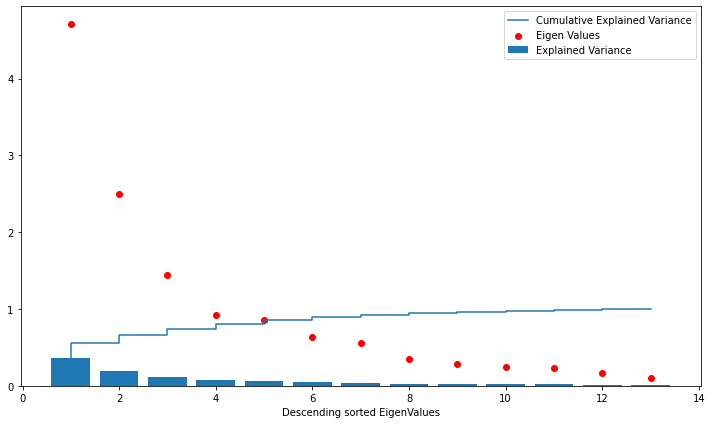

In [4]:
wine_y = wine_data[0]
wine_X = wine_data.drop(0,axis=1)
e_values, e_vectors, wine_Z = PCA(wine_X)

explained_variance = e_values/e_values.sum()
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,6))
plt.bar(range(1,wine_data.shape[-1]), explained_variance,label='Explained Variance')
plt.step(range(1,wine_data.shape[-1]), cumulative_variance,label='Cumulative Explained Variance')
plt.scatter(range(1,wine_data.shape[-1]), e_values, color='red',label='Eigen Values')
plt.xlabel("Descending sorted EigenValues")
plt.legend()
plt.tight_layout()

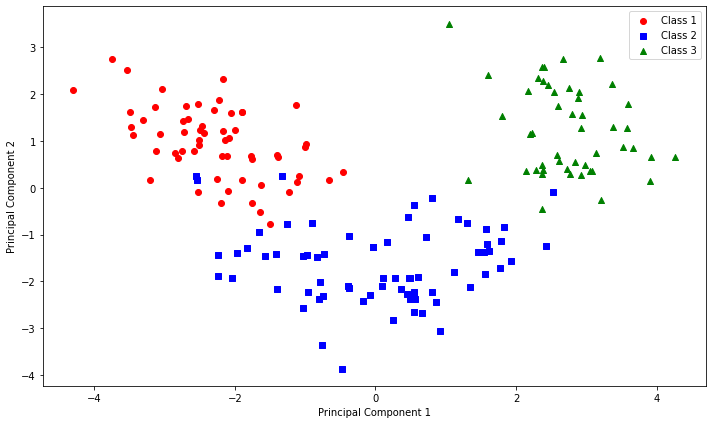

In [5]:
plot_colors = ['r', 'b', 'g']
plot_markers = ['o', 's', '^']

plt.figure(figsize=(10,6))
for unique_y in np.unique(wine_y):
    plt.scatter(
        wine_Z[wine_y==unique_y, 0],
        wine_Z[wine_y==unique_y, 1],
        color=plot_colors[unique_y-1], label=f'Class {unique_y}',
        marker=plot_markers[unique_y-1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()

### PCA using sckitlearn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca_transformer = PCA(n_components=2)
logistic_model = LogisticRegression(
    multi_class='ovr',
    random_state=1,
    solver='lbfgs'
)

wine_PCA = pca_transformer.fit_transform(standardize(wine_X))

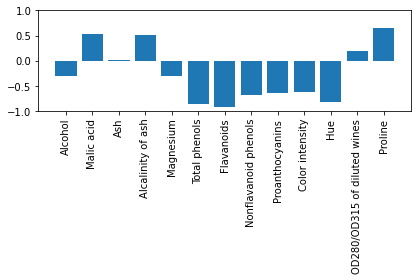

In [17]:
pca_loadings = e_vectors * np.sqrt(e_values)

wine_data_columns = [
                     'Alcohol',
                     'Malic acid',
                     'Ash',
                     'Alcalinity of ash',
                     'Magnesium',
                     'Total phenols',
                     'Flavanoids',
                     'Nonflavanoid phenols',
                     'Proanthocyanins',
                     'Color intensity',
                     'Hue',
                     'OD280/OD315 of diluted wines',
                     'Proline']

fig, ax = plt.subplots()
ax.bar(range(e_vectors.shape[-1]), pca_loadings[:,0])
ax.set_xticks((range(e_vectors.shape[-1])))
ax.set_xticklabels(wine_data_columns, rotation=90)
plt.ylim([-1,1])
plt.tight_layout()

## LDA